In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.isna().sum().sum()

0

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.iloc[:, 1:]
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
X = df.iloc[:, 2:]

In [19]:
Xtrain, Xtest = train_test_split(X, train_size=0.75, test_size=0.25)

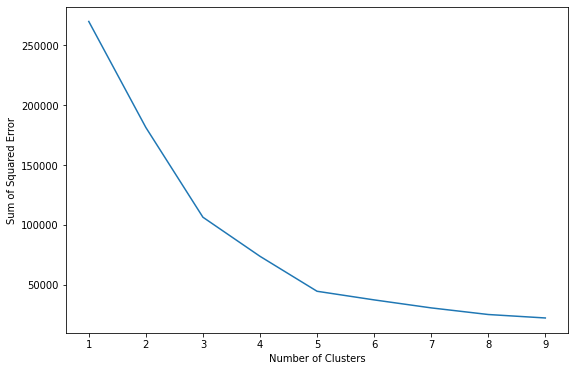

In [32]:
sse = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=50)
    model.fit(X)
    sse[k] = model.inertia_
    
plt.figure(figsize = (9*1, 6*1))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

In [21]:
model = KMeans(n_clusters=5, max_iter=50)
model = model.fit(Xtrain)

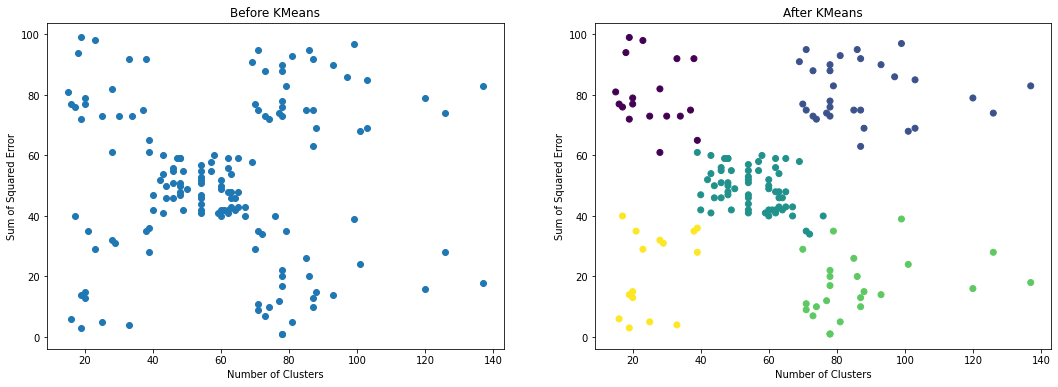

In [23]:
fig, axis = plt.subplots(1, 2, figsize = (9*2, 6*1))
axis[0].scatter(Xtrain['Annual Income (k$)'], Xtrain['Spending Score (1-100)'])
axis[0].set_title('Before KMeans')
axis[0].set_xlabel('Annual Income (k$)')
axis[0].set_ylabel('Spending Score (1-100)')

axis[1].scatter(Xtrain['Annual Income (k$)'], Xtrain['Spending Score (1-100)'], c=model.labels_)
axis[1].set_title('After KMeans')
axis[1].set_xlabel('Annual Income (k$)')
axis[1].set_ylabel('Spending Score (1-100)')

plt.show()

In [24]:
model = KMeans(n_clusters=5, max_iter=50)
model = model.fit(Xtest)

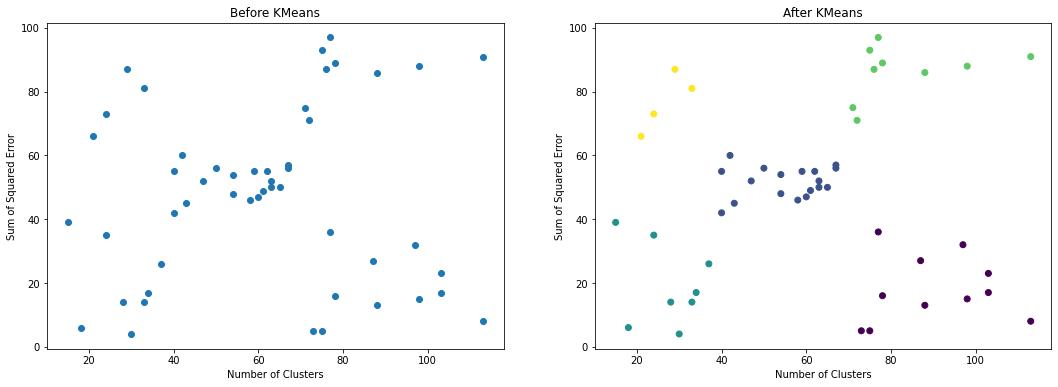

In [25]:
fig, axis = plt.subplots(1, 2, figsize = (9*2, 6*1))
axis[0].scatter(Xtest['Annual Income (k$)'], Xtest['Spending Score (1-100)'])
axis[0].set_title('Before KMeans')
axis[0].set_xlabel('Annual Income (k$)')
axis[0].set_ylabel('Spending Score (1-100)')

axis[1].scatter(Xtest['Annual Income (k$)'], Xtest['Spending Score (1-100)'], c=model.labels_)
axis[1].set_title('After KMeans')
axis[1].set_xlabel('Annual Income (k$)')
axis[1].set_ylabel('Spending Score (1-100)')

plt.show()